In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


(X_train, y_train), (_, _) = fashion_mnist.load_data()


X = X_train.reshape(-1, 28*28) / 255.0
print(f"Dataset shape: {X.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset shape: (60000, 784)


In [2]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_std = (X - mean) / std


In [3]:
cov_matrix = np.cov(X_std, rowvar=False)


In [4]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)


In [5]:
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[:, sorted_index]


In [22]:
k = 50  # For 2D
eigen_vectors_k = eigen_vectors[:, :k]


In [23]:
X_reduced = np.dot(X_std, eigen_vectors_k)


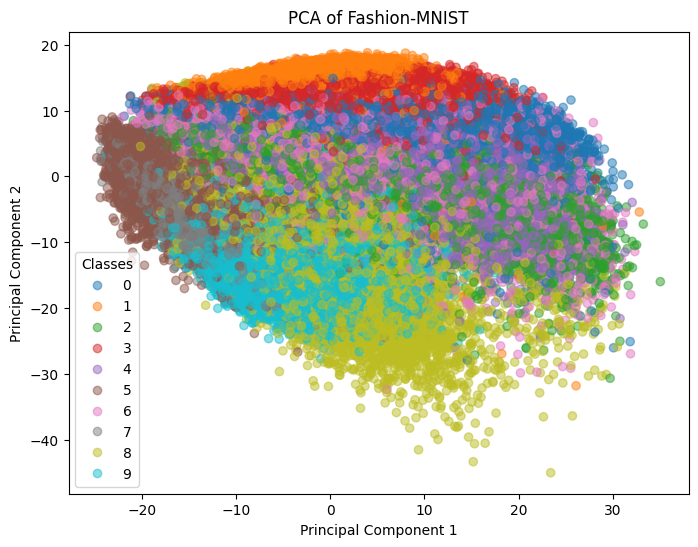

In [24]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("PCA of Fashion-MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


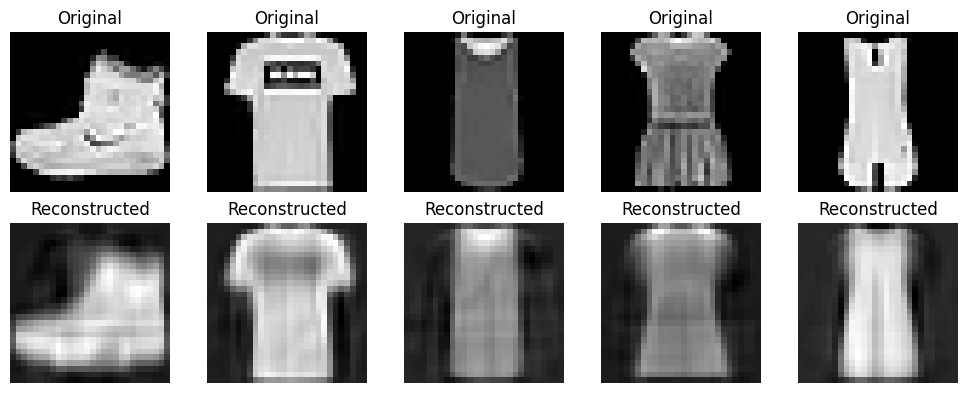

In [25]:
X_reconstructed = np.dot(X_reduced, eigen_vectors_k.T) * std + mean

n_images = 5
plt.figure(figsize=(10,4))
for i in range(n_images):
    plt.subplot(2, n_images, i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, n_images, i+1+n_images)
    plt.imshow(X_reconstructed[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (60000, 784)
Reduced shape: (60000, 50)


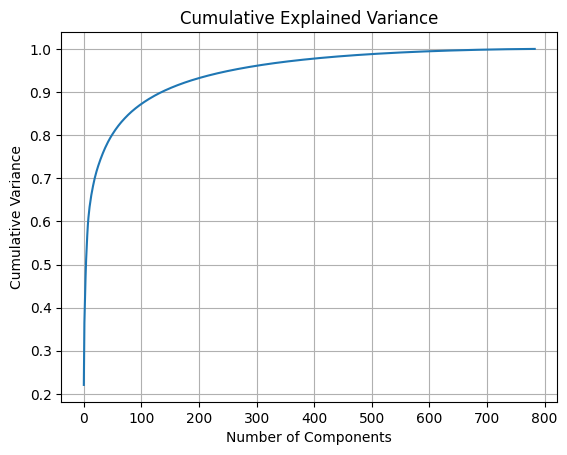

In [27]:
explained_variance_ratio = eigen_values / np.sum(eigen_values)
cumulative_variance = np.cumsum(explained_variance_ratio)


import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()


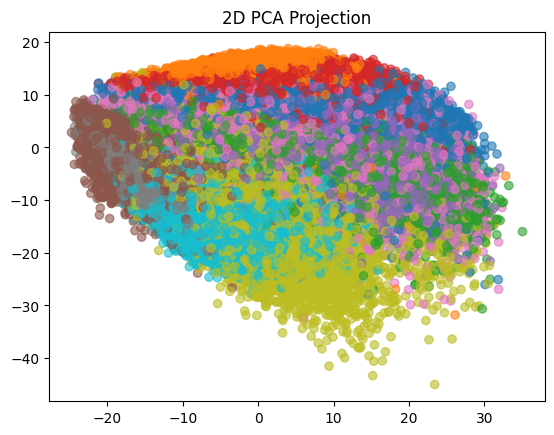

In [28]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.title("2D PCA Projection")
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error
loss = mean_squared_error(X, X_reconstructed)
print(f"Reconstruction MSE: {loss:.4f}")


Reconstruction MSE: 0.0143


In [30]:
for k in [2, 10, 50, 100, 200]:
    V_k = eigen_vectors[:, :k]
    X_red = np.dot(X_std, V_k)
    X_rec = np.dot(X_red, V_k.T) * std + mean
    mse = mean_squared_error(X, X_rec)
    print(f"k={k}, MSE={mse:.4f}")


k=2, MSE=0.0467
k=10, MSE=0.0258
k=50, MSE=0.0143
k=100, MSE=0.0099
k=200, MSE=0.0057
